In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import _california_housing

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, PredefinedSplit, train_test_split, KFold
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [4]:
dd = _california_housing.fetch_california_housing(as_frame=True, download_if_missing=True)
data, target, frame = list(dd.values())[:3]

In [5]:
data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [6]:
target.head(3)

0    4.526
1    3.585
2    3.521
Name: MedHouseVal, dtype: float64

### 1. Creating Split into Train & Test datasets with sklearn's built-in method

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, target)

In [8]:
x_train.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7265,4.3164,6.0,3.353468,0.977629,1754.0,3.923937,33.99,-118.22
2719,2.6172,21.0,5.271967,1.029289,805.0,3.368201,32.80,-115.48
16490,4.7069,27.0,6.523256,1.116279,873.0,3.383721,38.00,-120.97


In [9]:
x_test.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
10558,2.2969,16.0,5.000000,0.983740,380.0,1.544715,33.64,-117.72
17457,6.2685,6.0,8.010989,1.014652,697.0,2.553114,34.68,-120.44
3360,3.5536,19.0,5.742600,1.065637,2229.0,2.868726,40.36,-120.71


### 2. Creating Cross-Validation Strategy for Use with GridSearchCV

In [10]:
custom_cv = KFold(3)

### 3. Running the Grid Search on the Decision Tree

In [11]:
hyperparams_dict = {
    "criterion": ["squared_error", "absolute_error", "friedman_mse"],
    "splitter": ["best", "random"],
    "max_features": ["sqrt", "log2", 2]
}

In [12]:
model_ = DecisionTreeRegressor(random_state=1234)

In [13]:
gs = GridSearchCV(model_, param_grid=hyperparams_dict, cv=custom_cv, scoring="neg_root_mean_squared_error")

In [14]:
gs.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=1234),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_features': ['sqrt', 'log2', 2],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [15]:
cv_data = pd.DataFrame(data=gs.cv_results_).drop(columns=["params"])
cv_data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027313,0.001025,0.001667,0.000237,squared_error,sqrt,best,-0.797722,-0.743902,-0.803551,-0.781725,0.026851,6
1,0.008575,0.000007,0.001483,0.000059,squared_error,sqrt,random,-0.809684,-0.818023,-0.812318,-0.813342,0.003480,13
2,0.036928,0.001141,0.001494,0.000034,squared_error,log2,best,-0.782912,-0.736630,-0.738927,-0.752823,0.021297,1
3,0.009871,0.000125,0.001420,0.000025,squared_error,log2,random,-0.844867,-0.861306,-0.831873,-0.846015,0.012043,18
4,0.026476,0.000713,0.001478,0.000077,squared_error,2,best,-0.797722,-0.743902,-0.803551,-0.781725,0.026851,6
5,0.008567,0.000229,0.001467,0.000017,squared_error,2,random,-0.809684,-0.818023,-0.812318,-0.813342,0.003480,13
6,1.062563,0.088342,0.001843,0.000006,absolute_error,sqrt,best,-0.796074,-0.817111,-0.745951,-0.786379,0.029849,8
7,0.759577,0.101857,0.001915,0.000183,absolute_error,sqrt,random,-0.864013,-0.826372,-0.787985,-0.826123,0.031039,15
8,1.579847,0.038126,0.001745,0.000059,absolute_error,log2,best,-0.789746,-0.793194,-0.780462,-0.787800,0.005377,10
9,0.896743,0.145630,0.002436,0.000112,absolute_error,log2,random,-0.791790,-0.774004,-0.774663,-0.780152,0.008233,5


### 4. Review the Best Model Found

In [16]:
print(f"RMSE of the best model is: {-gs.best_score_}")

RMSE of the best model is: 0.7528230594944177


In [17]:
best_model = gs.best_estimator_

In [18]:
from sklearn.tree import plot_tree

#### 4.1. Draw the Best Tree (Top 3 Levels)

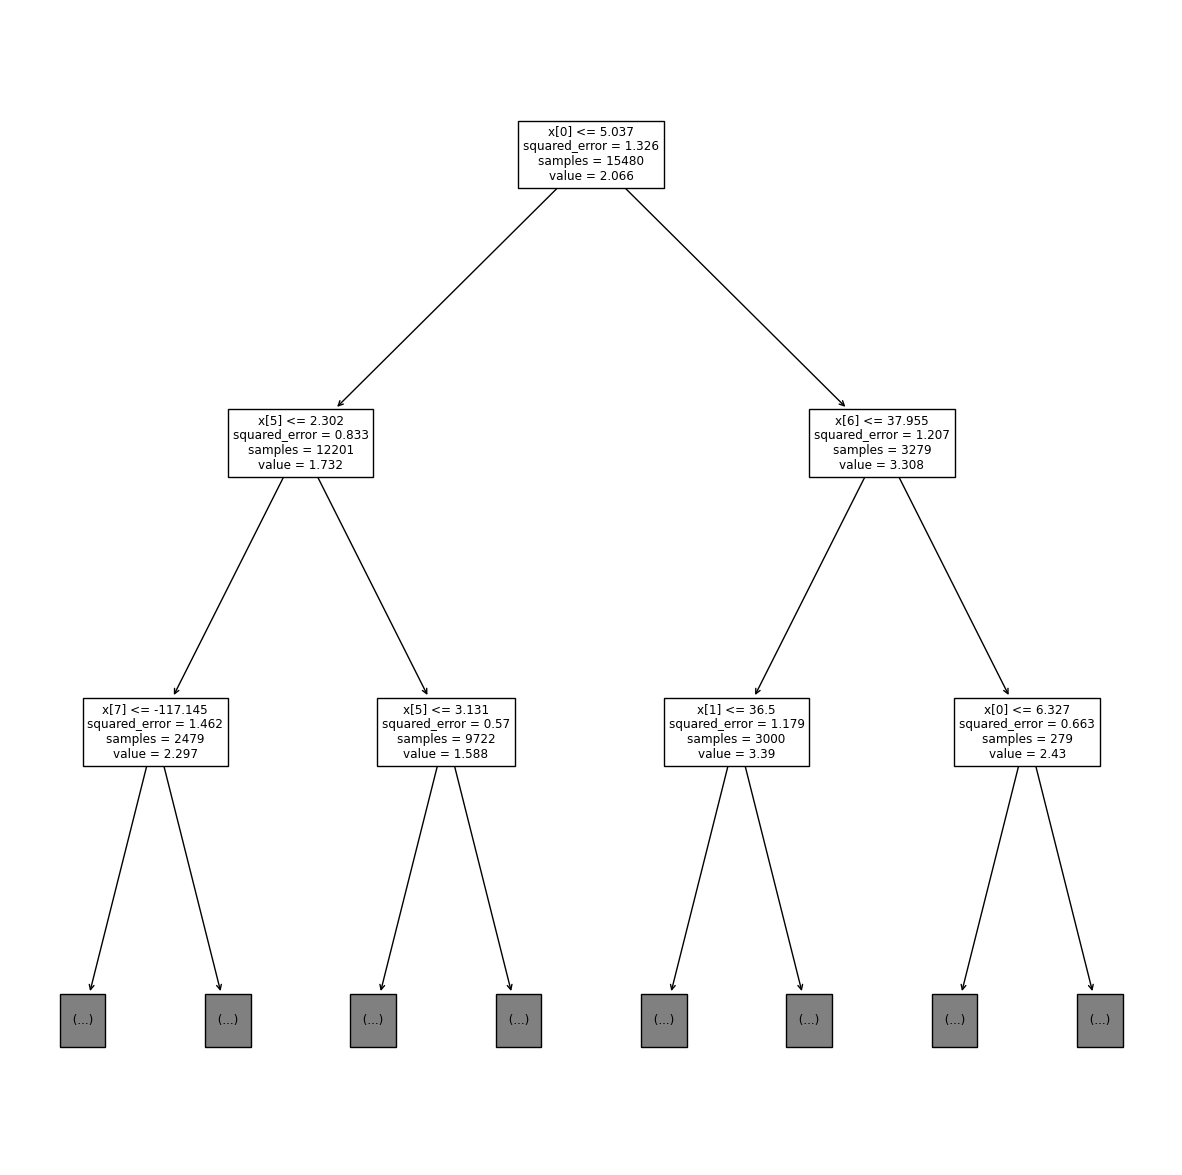

In [26]:
fig_tree = plt.figure(figsize=(15, 15))
plot_tree(best_model, max_depth=2)
plt.show()

#### 4.2. Scatter Plot of Predictions vs Actuals on the Test Set

In [27]:
y_hat = best_model.predict(x_test)

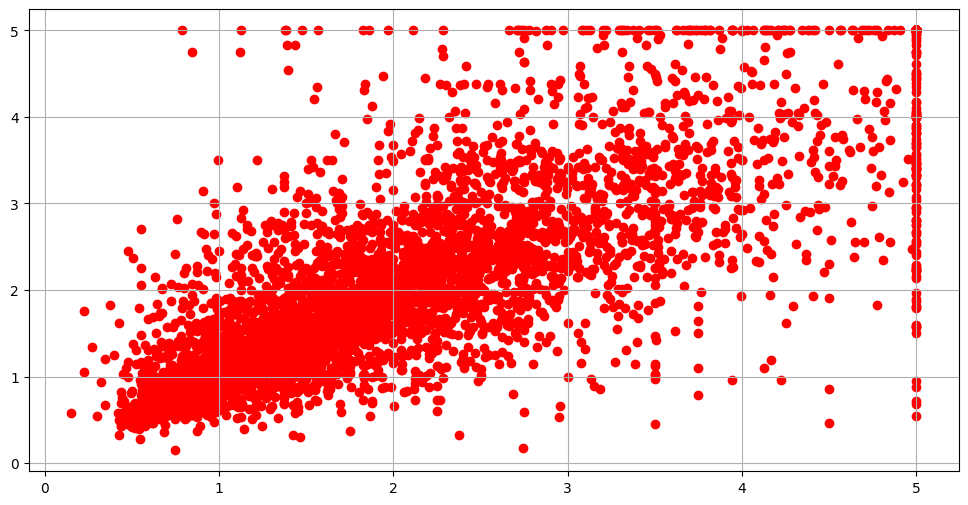

In [34]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_test, y_hat, color="red")
ax.grid()
plt.show()